In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as stat

In [3]:
df1 = pd.read_csv('MLF_GP1_CreditScore.csv', header=0)
df1.shape

(1700, 28)

In [4]:
df1.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


In [5]:
df1.isnull().sum()

Sales/Revenues              0
Gross Margin                0
EBITDA                      0
EBITDA Margin               0
Net Income Before Extras    0
Total Debt                  0
Net Debt                    0
LT Debt                     0
ST Debt                     0
Cash                        0
Free Cash Flow              0
Total Debt/EBITDA           0
Net Debt/EBITDA             0
Total MV                    0
Total Debt/MV               0
Net Debt/MV                 0
CFO/Debt                    0
CFO                         0
Interest Coverage           0
Total Liquidity             0
Current Liquidity           0
Current Liabilities         0
EPS Before Extras           0
PE                          0
ROA                         0
ROE                         0
InvGrd                      0
Rating                      0
dtype: int64

In [6]:
df1.dtypes

Sales/Revenues              float64
Gross Margin                float64
EBITDA                      float64
EBITDA Margin               float64
Net Income Before Extras    float64
Total Debt                  float64
Net Debt                    float64
LT Debt                     float64
ST Debt                     float64
Cash                        float64
Free Cash Flow              float64
Total Debt/EBITDA           float64
Net Debt/EBITDA             float64
Total MV                    float64
Total Debt/MV               float64
Net Debt/MV                 float64
CFO/Debt                    float64
CFO                         float64
Interest Coverage           float64
Total Liquidity             float64
Current Liquidity           float64
Current Liabilities         float64
EPS Before Extras           float64
PE                          float64
ROA                         float64
ROE                         float64
InvGrd                        int64
Rating                      

In [106]:
corMat = pd.DataFrame(df1.corr())
corMat

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
Sales/Revenues,1.000000,-0.026318,0.500178,-0.124079,0.012024,0.068938,0.175741,0.048960,0.014987,-0.008088,...,0.034069,0.032716,0.035747,-0.081346,0.553807,0.034722,-0.014842,0.007251,-0.000206,-0.080836
Gross Margin,-0.026318,1.000000,0.114092,0.147886,-0.001061,-0.002665,0.004266,-0.003149,-0.005417,-0.024540,...,-0.055569,-0.002079,-0.011190,-0.022793,0.051386,0.000857,0.029146,-0.001583,0.000182,-0.066103
EBITDA,0.500178,0.114092,1.000000,0.757142,0.012565,0.008949,0.119251,-0.000665,0.004844,-0.030773,...,-0.041064,0.028118,-0.008799,-0.054680,0.207526,0.042191,0.040732,0.007913,-0.005701,-0.085951
EBITDA Margin,-0.124079,0.147886,0.757142,1.000000,0.003331,-0.039804,0.000336,-0.037009,-0.006310,-0.023997,...,-0.075326,0.008147,-0.033862,-0.000036,-0.119068,0.021589,0.071426,0.002072,-0.008328,-0.024112
Net Income Before Extras,0.012024,-0.001061,0.012565,0.003331,1.000000,-0.001065,0.000867,-0.001162,-0.000221,-0.006703,...,0.001832,0.002233,-0.001938,-0.008131,0.004226,0.506547,-0.003166,0.997349,0.782491,-0.027919
Total Debt,0.068938,-0.002665,0.008949,-0.039804,-0.001065,1.000000,-0.022209,0.833567,0.118240,-0.030002,...,0.000924,-0.016078,-0.000801,-0.031600,0.062364,-0.001424,-0.003652,-0.001406,0.000301,-0.090372
Net Debt,0.175741,0.004266,0.119251,0.000336,0.000867,-0.022209,1.000000,-0.021307,0.001191,0.007184,...,0.002762,-0.003566,0.000492,-0.003824,0.059139,0.001046,-0.000371,-0.000709,-0.001965,-0.042195
LT Debt,0.048960,-0.003149,-0.000665,-0.037009,-0.001162,0.833567,-0.021307,1.000000,0.092393,-0.030084,...,0.001270,-0.014810,-0.000532,-0.026573,0.023553,-0.001298,-0.003545,-0.001303,0.000712,-0.061665
ST Debt,0.014987,-0.005417,0.004844,-0.006310,-0.000221,0.118240,0.001191,0.092393,1.000000,-0.012802,...,0.002729,-0.007233,0.000503,-0.023235,0.105872,0.000275,-0.002704,-0.000339,-0.001022,-0.003028
Cash,-0.008088,-0.024540,-0.030773,-0.023997,-0.006703,-0.030002,0.007184,-0.030084,-0.012802,1.000000,...,0.019751,-0.023920,0.023993,0.973123,0.004712,-0.017470,0.034156,-0.006606,-0.000344,-0.088877


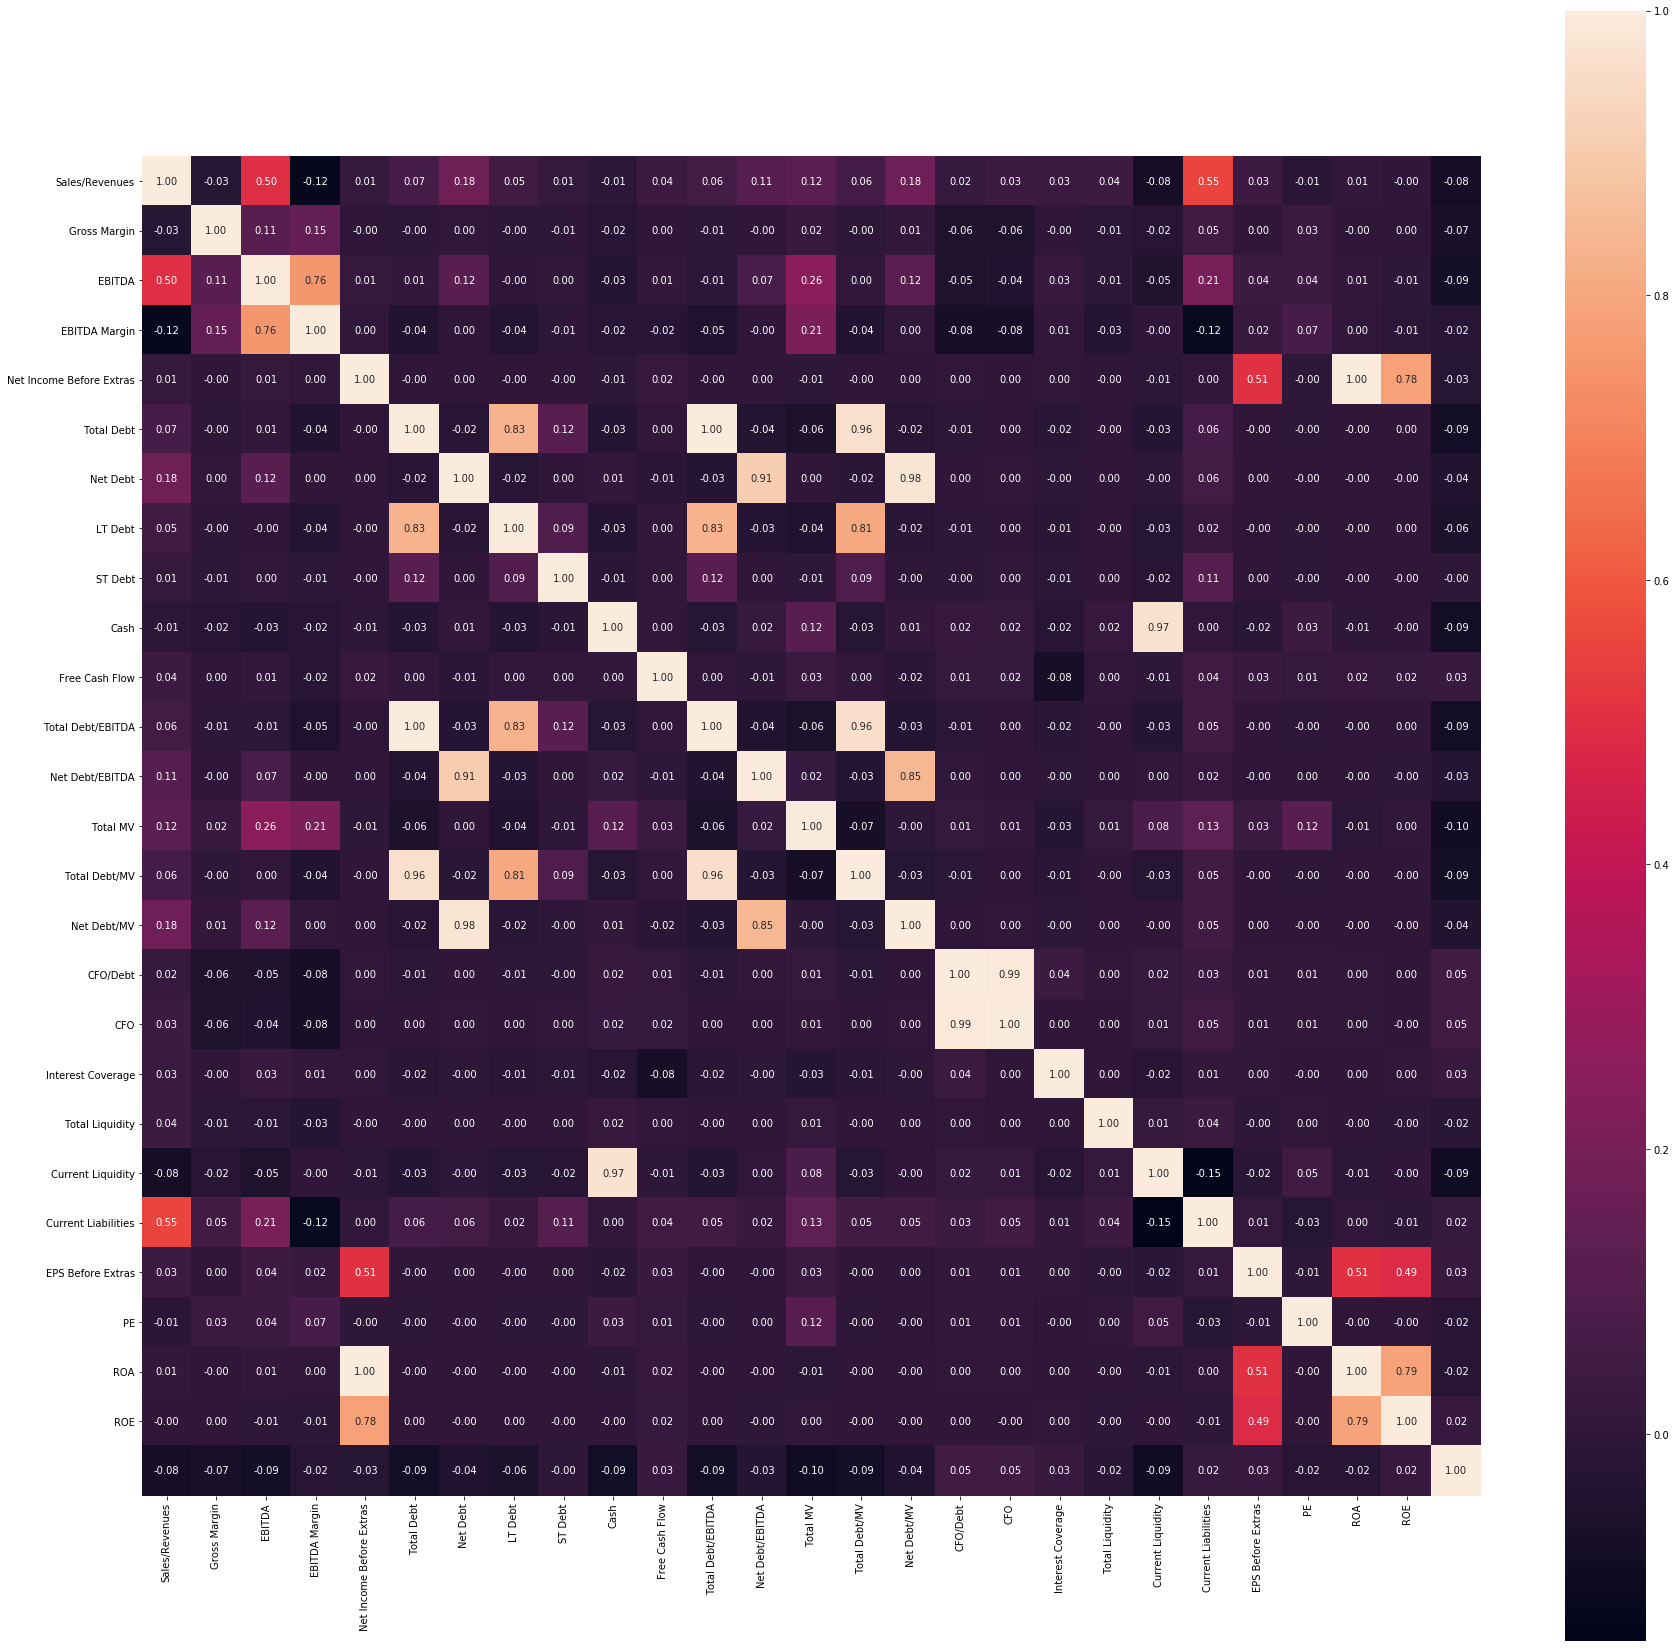

In [107]:
#Heatmap
plt.figure(figsize=(30,30))
hm = sns.heatmap(corMat,
cbar=True,
annot=True,
square=True,
fmt='.2f',
annot_kws={'size':10},
yticklabels=df.columns,
xticklabels=df.columns)
plt.show()

## Part I, Binary 

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
df_X = df1.iloc[:,:-2]
df_y = df1.iloc[:,-2]


In [10]:
df_X.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO/Debt,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.101245,0.068526,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.101245,0.068526,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.027638,0.068136,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.042437,0.073784,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.106052,0.132845,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144


In [11]:
df_y.head()

0    1
1    1
2    1
3    1
4    1
Name: InvGrd, dtype: int64

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

## Normalized and PCA 

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt


In [14]:
df = df1.iloc[:,:-2]

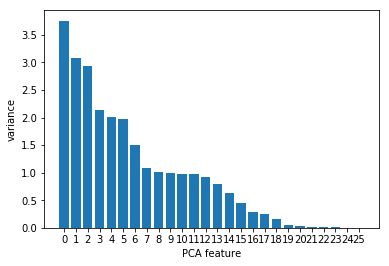

In [15]:
MMscale = MinMaxScaler().fit(df_X)
df_X = MMscale.transform(df_X)

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(df_X)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()
## Shows that 

In [88]:
X = df1.iloc[:,:-2]
y = df1.iloc[:,-2]

In [89]:
##data without PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
pca=PCA(n_components=7)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.fit_transform(X_test)

In [91]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(1360, 7)
(340, 7)


# Binary 

### Logistic Regression without PCA

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logreg = LogisticRegression()

In [22]:
c_space = np.logspace(0, 5, 50)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}
logreg_cv = GridSearchCV(logreg, param_grid, cv=10)


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
log_untune = LogisticRegression()
log_untune.fit(X_train,y_train)


/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred_log_ut = log_untune.predict(X_test)

In [26]:
logreg_acc = accuracy_score(y_pred_log_ut,y_test)

In [105]:
logreg_acc

0.7676470588235295

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [30]:
from sklearn.metrics import classification_report


In [31]:
print(classification_report(y_test, y_pred_log_ut))

              precision    recall  f1-score   support

           0       0.73      0.10      0.17        84
           1       0.77      0.99      0.86       256

    accuracy                           0.77       340
   macro avg       0.75      0.54      0.52       340
weighted avg       0.76      0.77      0.69       340



/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


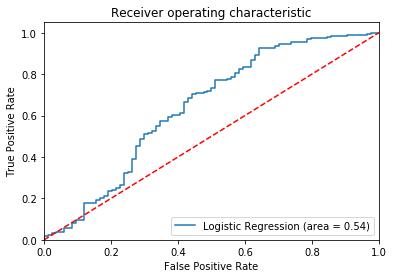

In [32]:
logit_roc_auc = roc_auc_score(y_test, y_pred_log_ut)
log_untune.fit(X_train,y_train)
fpr, tpr, thresholds = roc_curve(y_test, log_untune.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [33]:
print(classification_report(y_test, y_pred_log_ut))
print(logreg_acc)

              precision    recall  f1-score   support

           0       0.73      0.10      0.17        84
           1       0.77      0.99      0.86       256

    accuracy                           0.77       340
   macro avg       0.75      0.54      0.52       340
weighted avg       0.76      0.77      0.69       340

0.7676470588235295


### Logistics with PCA

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
log_untune_pca = LogisticRegression()
log_untune_pca.fit(X_train_pca,y_train)
y_pred_log_ut_pca = log_untune_pca.predict(X_test_pca)
logreg_acc_pca = accuracy_score(y_pred_log_ut_pca,y_test)
print(logreg_acc_pca)

0.7470588235294118


/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
print(classification_report(y_test, y_pred_log_ut_pca))

              precision    recall  f1-score   support

           0       0.25      0.01      0.02        84
           1       0.75      0.99      0.85       256

    accuracy                           0.75       340
   macro avg       0.50      0.50      0.44       340
weighted avg       0.63      0.75      0.65       340



/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


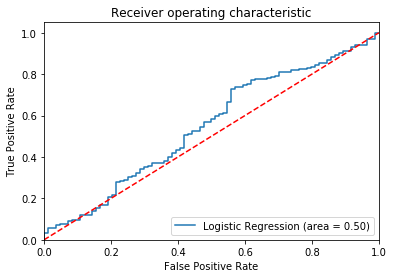

In [36]:
logit_roc_auc_pca = roc_auc_score(y_test, y_pred_log_ut_pca)
log_untune_pca.fit(X_train_pca,y_train)
fpr, tpr, thresholds = roc_curve(y_test, log_untune_pca.predict_proba(X_test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_pca)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### SVC

In [37]:
from sklearn.svm import SVC

In [39]:
svc = SVC()
svc.fit(X_train,y_train)


/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [40]:
y_pred_svc = svc.predict(X_test)
svc_acc=accuracy_score(y_pred_svc,y_test)
print(svc_acc)

0.7823529411764706


### SVC with PCA

In [42]:
from sklearn.svm import SVC

svc_untune_pca = SVC()
svc_untune_pca.fit(X_train_pca,y_train)
y_pred_svc_ut_pca = svc_untune_pca.predict(X_test_pca)
svc_acc_pca = accuracy_score(y_pred_svc_ut_pca,y_test)
print(svc_acc_pca)

0.7529411764705882


/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [43]:
print(classification_report(y_test, y_pred_svc_ut_pca))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.75      1.00      0.86       256

    accuracy                           0.75       340
   macro avg       0.38      0.50      0.43       340
weighted avg       0.57      0.75      0.65       340



/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
y_pred_knn = knn.predict(X_test)


In [47]:
knn_acc=accuracy_score(y_pred_knn,y_test)

In [48]:
print(knn_acc)

0.8

In [49]:
logreg_acc 

0.7676470588235295

In [50]:
svc_acc

0.7823529411764706

### KNN with pca

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca,y_train)
y_pred_knn_pca = knn_pca.predict(X_test_pca)
knn_acc_pca=accuracy_score(y_pred_knn_pca,y_test)
print(knn_acc_pca)

0.7411764705882353


### KNN Tuned

In [110]:
knn_tuned = KNeighborsClassifier()
knn_tuned.fit(X_train,y_train)
parameters ={'n_neighbors':[2,3,4,5,6,7,8,9]}
gs_knn = GridSearchCV(knn_tuned,parameters,cv=10)
gs_knn.fit(X_train,y_train)
print('Best CV params',gs_knn.best_params_)
print('Best CV accuracy',gs_knn.best_score_)
print('Test accurarcy of best grid search hypers:',gs_knn.score(X_train,y_train))

Best CV params {'n_neighbors': 3}
Best CV accuracy 0.8051470588235294
Test accurarcy of best grid search hypers: 0.9022058823529412


### Ensembling 

In [112]:
param_grid = {
                 'n_estimators': [20,25,30,35,40,45,50],
                 'max_depth': [12, 13, 14, 15, 16, 17],
                'criterion':['gini','entropy']
             }

In [113]:
rf = RandomForestClassifier()
grid_rf_binary = GridSearchCV(rf, param_grid,cv = 10)
grid_rf_binary.fit(X_train, y_train)
print("Tuned Random Forest Parameter: {}".format(grid_rf_binary.best_params_))
print("Tuned Random Forest Accuracy: {}".format(grid_rf_binary.best_score_))

Tuned Random Forest Parameter: {'criterion': 'gini', 'max_depth': 16, 'n_estimators': 50}
Tuned Random Forest Accuracy: 0.8727941176470588


# Multiclass

In [53]:
y_multi = df1.iloc[:,-1]

In [54]:
y_multi.head()

0    A1
1    A1
2    A1
3    A1
4    A1
Name: Rating, dtype: object

In [55]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y_multi, test_size=0.2, random_state=42)

In [56]:
X_train_multi.shape


(1360, 26)

### Logistic

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import math


In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
log_multi = LogisticRegression()
log_multi.fit(X_train_multi,y_train_multi)
y_pred_log_multi = log_multi.predict(X_test_multi)
logreg_acc_multi = accuracy_score(y_pred_log_multi,y_test_multi)
print(logreg_acc_multi)

/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.19117647058823528


In [65]:
from sklearn.linear_model import LogisticRegression

log_multi_tuned = LogisticRegression(C=3.526315789473684)
log_multi_tuned.fit(X_train_multi,y_train_multi)
y_pred_log_multi_tuned = log_multi_tuned.predict(X_test_multi)
logreg_acc_multi_tuned = accuracy_score(y_pred_log_multi_tuned,y_test_multi)
print(logreg_acc_multi_tuned)

/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.19411764705882353


### Ridge classifier

In [254]:
from sklearn.linear_model import RidgeClassifier

In [259]:
ridge = RidgeClassifier()
ridge.fit(X_train_multi,y_train_multi)
y_pred_ridge_multi = ridge.predict(X_test_multi)
ridge_multi_acc = accuracy_score(y_pred_ridge_multi,y_test_multi)
print(ridge_multi_acc)

0.18235294117647058


### SVC

In [83]:
from sklearn.svm import SVC

svc_untune_multi = SVC()
svc_untune_multi.fit(X_train_multi,y_train_multi)
y_pred_svc_ut_multi = svc_untune_multi.predict(X_test_multi)
svc_acc_multi = accuracy_score(y_pred_svc_ut_multi,y_test_multi)
print(svc_acc_multi)

0.3176470588235294


/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [74]:
svm = SVC()
svm.fit(X_train_multi,y_train_multi)
parameters ={'C':[0.1,1,5,10],'gamma':[0.00001,0.0001,0.001,0.01,0.1]}
searcher = GridSearchCV(svm,parameters,cv=10)
searcher.fit(X_train_multi,y_train_multi)
print('Best CV params',searcher.best_params_)
print('Best CV accuracy',searcher.best_score_)
print('Test accurarcy of best grid search hypers:',searcher.score(X_train_multi,y_train_multi))

/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best CV params {'C': 10, 'gamma': 0.1}
Best CV accuracy 0.40294117647058825
Test accurarcy of best grid search hypers: 0.825


In [85]:
svc_tuned_multi = SVC(C=10, gamma=0.1)
svc_tuned_multi.fit(X_train_multi,y_train_multi)
y_pred_svc_tuned_multi = svc_tuned_multi.predict(X_test_multi)
accuracy_score(y_pred_svc_tuned_multi, y_test_multi)

0.4441176470588235

### KNN

In [102]:
knn_multi = KNeighborsClassifier(n_neighbors=5)
knn_multi.fit(X_train_multi,y_train_multi)
y_pred_knn_multi = knn_multi.predict(X_test_multi)
knn_acc_multi=accuracy_score(y_pred_knn_multi,y_test_multi)
print(knn_acc_multi)

0.3264705882352941


In [103]:
knn_tuned_multi = KNeighborsClassifier()
svm.fit(X_train_multi,y_train_multi)
parameters ={'n_neighbors':[2,3,4,5,6,7,8,9]}
gs_knn_multi = GridSearchCV(knn_tuned_multi,parameters,cv=10)
gs_knn_multi.fit(X_train_multi,y_train_multi)
print('Best CV params',gs_knn_multi.best_params_)
print('Best CV accuracy',gs_knn_multi.best_score_)
print('Test accurarcy of best grid search hypers:',gs_knn_multi.score(X_train_multi,y_train_multi))

/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Best CV params {'n_neighbors': 2}
Best CV accuracy 0.3735294117647059
Test accurarcy of best grid search hypers: 0.7345588235294118


/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### RandomForest

In [71]:
param_grid = {
                 'n_estimators': [20,25,30,35,40,45,50],
                 'max_depth': [12, 13, 14, 15, 16, 17],
                'criterion':['gini','entropy']
             }

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, param_grid,cv = 10)
grid_rf.fit(X_train_multi, y_train_multi)
print("Tuned Random Forest Parameter: {}".format(grid_rf.best_params_))
print("Tuned Random Forest Accuracy: {}".format(grid_rf.best_score_))

/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Tuned Random Forest Parameter: {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 50}
Tuned Random Forest Accuracy: 0.6154411764705883


In [69]:
grid_rf.best_params_

{'max_depth': 16, 'n_estimators': 50}